In [114]:
import pickle
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(filename):
    """Load and return data saved to disc with the function `save_data`."""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
isingSquare = load_data('data_ising_square_largeL.pkl')
isingSquare.keys()

dict_keys([16, 128, 32, 8, 64, 'Ls', 256])

In [4]:
print(isingSquare['Ls'])
isingSquare[8].keys()

[8, 16, 32, 64, 128, 256]


dict_keys(['absM', 'UB', 'observables', 'L', 'chi', 'M', 'N_measure', 'C', 'N_bins', 'E', 'Ts'])

In [14]:
Cv = []
M = []
temp = []
bindercum = []

for i in isingSquare['Ls']:
    Cv.append(isingSquare[i]['C'])
    M.append(isingSquare[i]['chi'])
    temp.append(isingSquare[i]['Ts'])
    bindercum.append(isingSquare[i]['UB'])

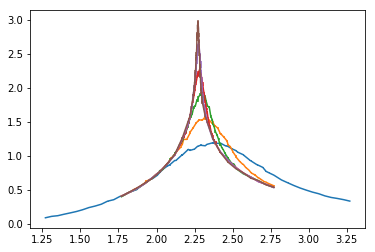

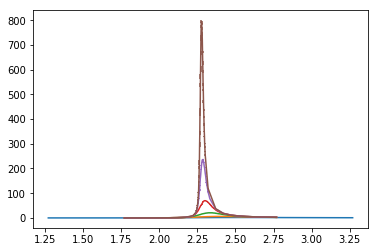

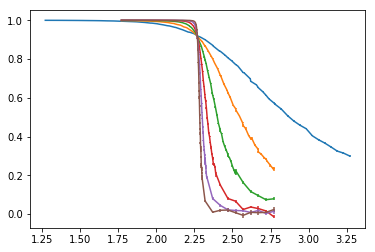

In [71]:
nL = len(isingSquare['Ls'])

for i in range(nL):
    plt.errorbar(temp[i], Cv[i][:,0], Cv[i][:,1])
plt.show()

for i in range(nL):
    plt.errorbar(temp[i], M[i][:,0], M[i][:,1])
plt.show()

for i in range(nL):
    plt.errorbar(temp[i], bindercum[i][:,0], bindercum[i][:,1])
plt.show()

In [74]:
Linverse = []
Tcindex_for_Cv = []
Tc_for_Cv = []
Tcindex_for_M = []
Tc_for_M = []

for i,L in enumerate(isingSquare['Ls']):
    Linverse.append(1./L)
    
    Tcindex_for_Cv.append(np.argmax(Cv[i][:,0]))
    Tcindex_for_M.append(np.argmax(M[i][:,0]))
    Tc_for_Cv.append(temp[i][Tcindex_for_Cv[i]])
    Tc_for_M.append(temp[i][Tcindex_for_M[i]])

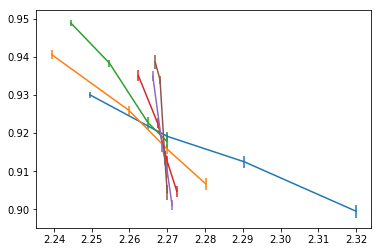

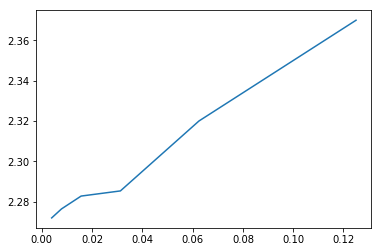

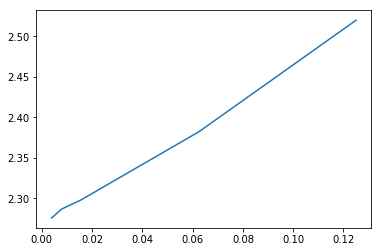

In [104]:
k,l = 2,6
for i in range(nL):
    Tci = Tcindex_for_Cv[i]
    plt.errorbar(temp[i][Tci+k:Tci+l], \
                 bindercum[i][Tci+k:Tci+l,0], bindercum[i][Tci+k:Tci+l,1])
plt.show()

plt.plot(Linverse, Tc_for_Cv)
plt.show()
plt.plot(Linverse, Tc_for_M)
plt.show()

In [105]:
Tcfit_for_Cv = np.polyfit(Linverse, Tc_for_Cv, deg=1) # max degree = len(Linverse)-1
Tcfit_for_M = np.polyfit(Linverse, Tc_for_M, deg=1)

Tcpol_for_Cv = np.poly1d(Tcfit_for_Cv)
Tcpol_for_M = np.poly1d(Tcfit_for_M)

print(Tcpol_for_Cv(0)) # Tc at L->inf
print(Tcpol_for_M(0))

2.2677535790435566
2.266420956442277


In [116]:
k,l = 2,6
for i in range(nL-1):
    Tci = Tcindex_for_Cv[i]
    Tcfit1_for_binder = np.polyfit(temp[i][Tci+k:Tci+l], \
                                   bindercum[i][Tci+k:Tci+l,0], deg=1)
    Tcfit2_for_binder = np.polyfit(temp[i+1][Tci+k:Tci+l], \
                                   bindercum[i+1][Tci+k:Tci+l,0], deg=1)
    Tcpol1_for_binder = np.poly1d(Tcfit1_for_binder)
    Tcpol2_for_binder = np.poly1d(Tcfit2_for_binder)
    
    Tc = fsolve(Tcpol2_for_binder - Tcpol1_for_binder, 2.26)
    print(Tc)

        

[2.26052839]
[2.26816692]
[2.26763346]
[2.26896346]
[2.26945327]
